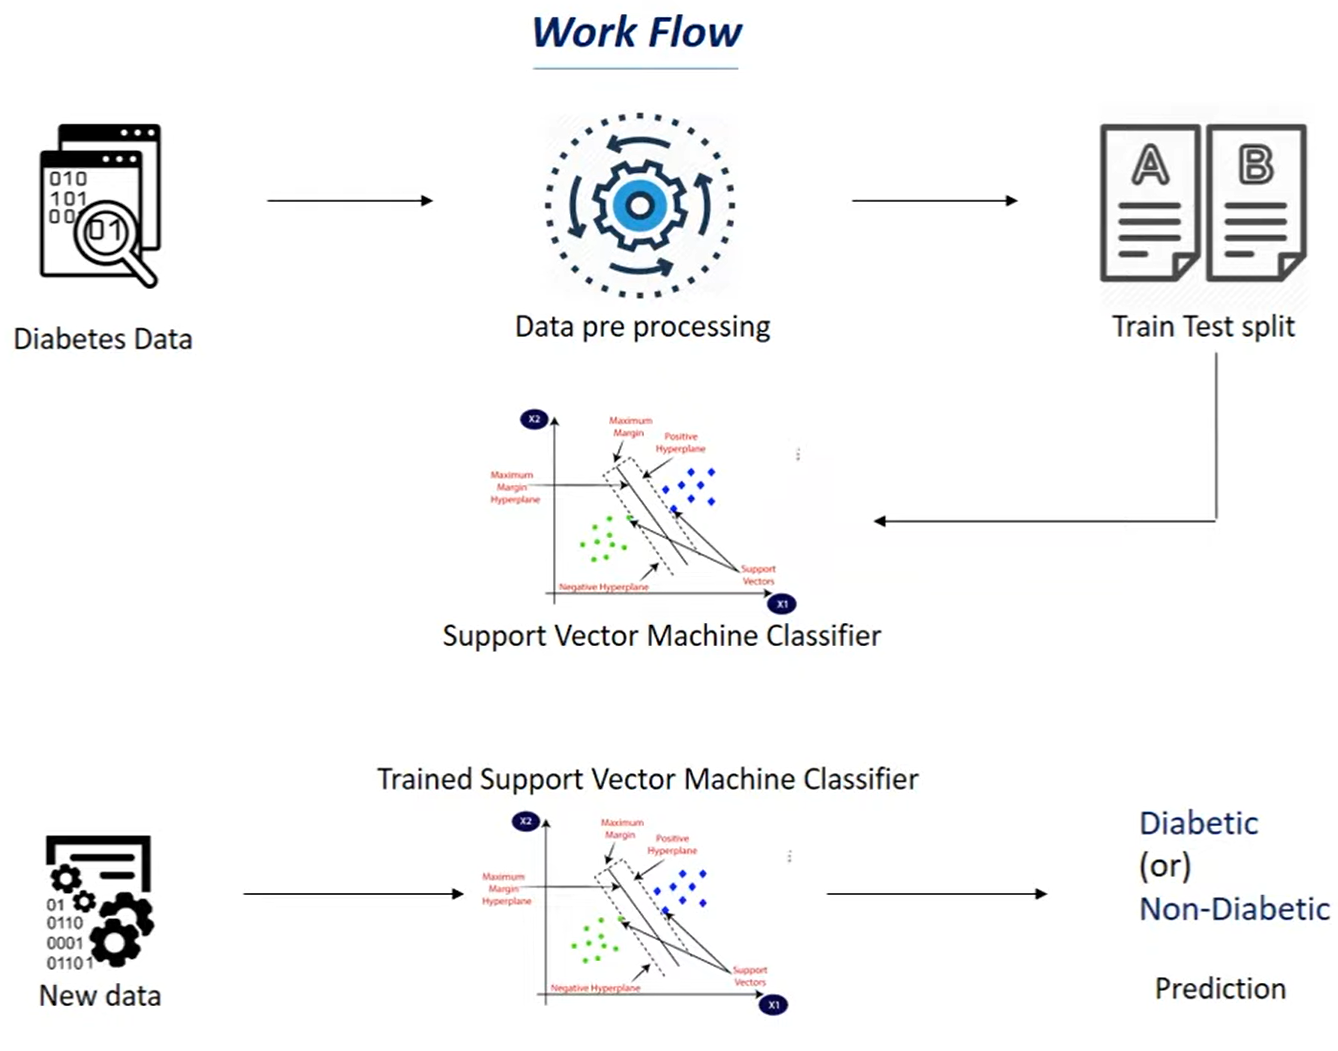

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv(r"C:\Users\PC\Desktop\MACHINE LEARNING\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Count of Outcome
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#Finding the mean
df.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
#Separating Data and Labels
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

Data Standardization

In [9]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [62]:
standardized_data.shape

(768, 8)

In [10]:
X=standardized_data
Y=df['Outcome']

Train Test Data

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y ,random_state=0)

In [66]:
X.shape,X_train.shape,X_test.shape

((768, 8), (614, 8), (154, 8))

Training the model

In [14]:
model=svm.SVC(kernel='linear')

In [15]:
#Training the Support Vector Machine(SVC)
model.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation 

Accuracy Score

In [16]:
X_train_Prediction = model.predict(X_train)
Training_data_accuracy =accuracy_score( X_train_Prediction, Y_train)
print('The Training Data Acccuracy is :', Training_data_accuracy)


The Training Data Acccuracy is : 0.7801302931596091


In [17]:
X_test_Prediction = model.predict(X_test)
Test_data_accuracy =accuracy_score( X_test_Prediction, Y_test)
print('The Test Data Acccuracy is :', Test_data_accuracy) 

The Test Data Acccuracy is : 0.7792207792207793


Making a predictive system

In [21]:
#Making a prediction
input_data = (1,103,30,38,83,43.3,0.183,33)
#Use numpy Array
input_data_as_numpy_array = np.asarray(input_data)
#Shape the data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#Standardize the data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
#Making Prediction
prediction = model.predict(std_data )
print(prediction)
if prediction==1:
    print('The patient is DIABETIC')
else:
    print('The patient is NON-DIABETIC')

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The patient is NON-DIABETIC


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
